In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
! rm -d -f -r rm *.jpg?


In [9]:
import tensorflow as tf  

# Display the version
print(tf.__version__)    
 
# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

from keras.callbacks import ModelCheckpoint   
import time
from sklearn.model_selection import train_test_split
from keras.models import load_model 
# from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


2.7.0


In [17]:


# datagen = ImageDataGenerator()


datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

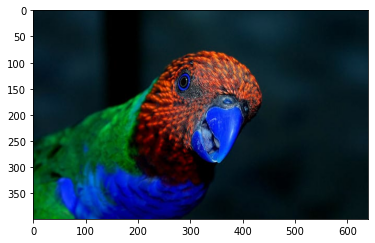

numpy.ndarray

In [19]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# use opencv to load the image
image = cv2.imread('bird.jpg', 1)

# convert it to numpy array
pixels = np.array(image)
plt.imshow(pixels)
plt.show()

x  = img_to_array(pixels)
type(x)
# type(pixels)


In [14]:
pixels.shape

(399, 640, 3)

In [20]:


img = load_img('bird.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
augmented = np.zeros ((10 , 399 , 640 , 3))
for batch in datagen.flow(x, batch_size=1, save_to_dir = '/content' , save_prefix='bird_', save_format='jpeg'):
    augmented[i , : , : , : ] = batch
    i += 1
    if i > 9:
        break  # otherwise the generator would loop indefinitely

<Figure size 432x288 with 0 Axes>

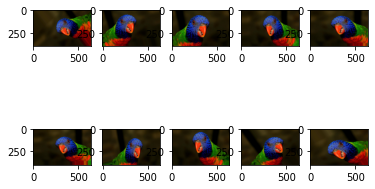

In [24]:
plt.tight_layout()
fig, axs = plt.subplots(2, 5)

for i in range(10):
	# define subplot
	plt.subplot(2, 5, i+1)
	# batch = it.next()
	# convert to unsigned integers for viewing
	image = augmented[i].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

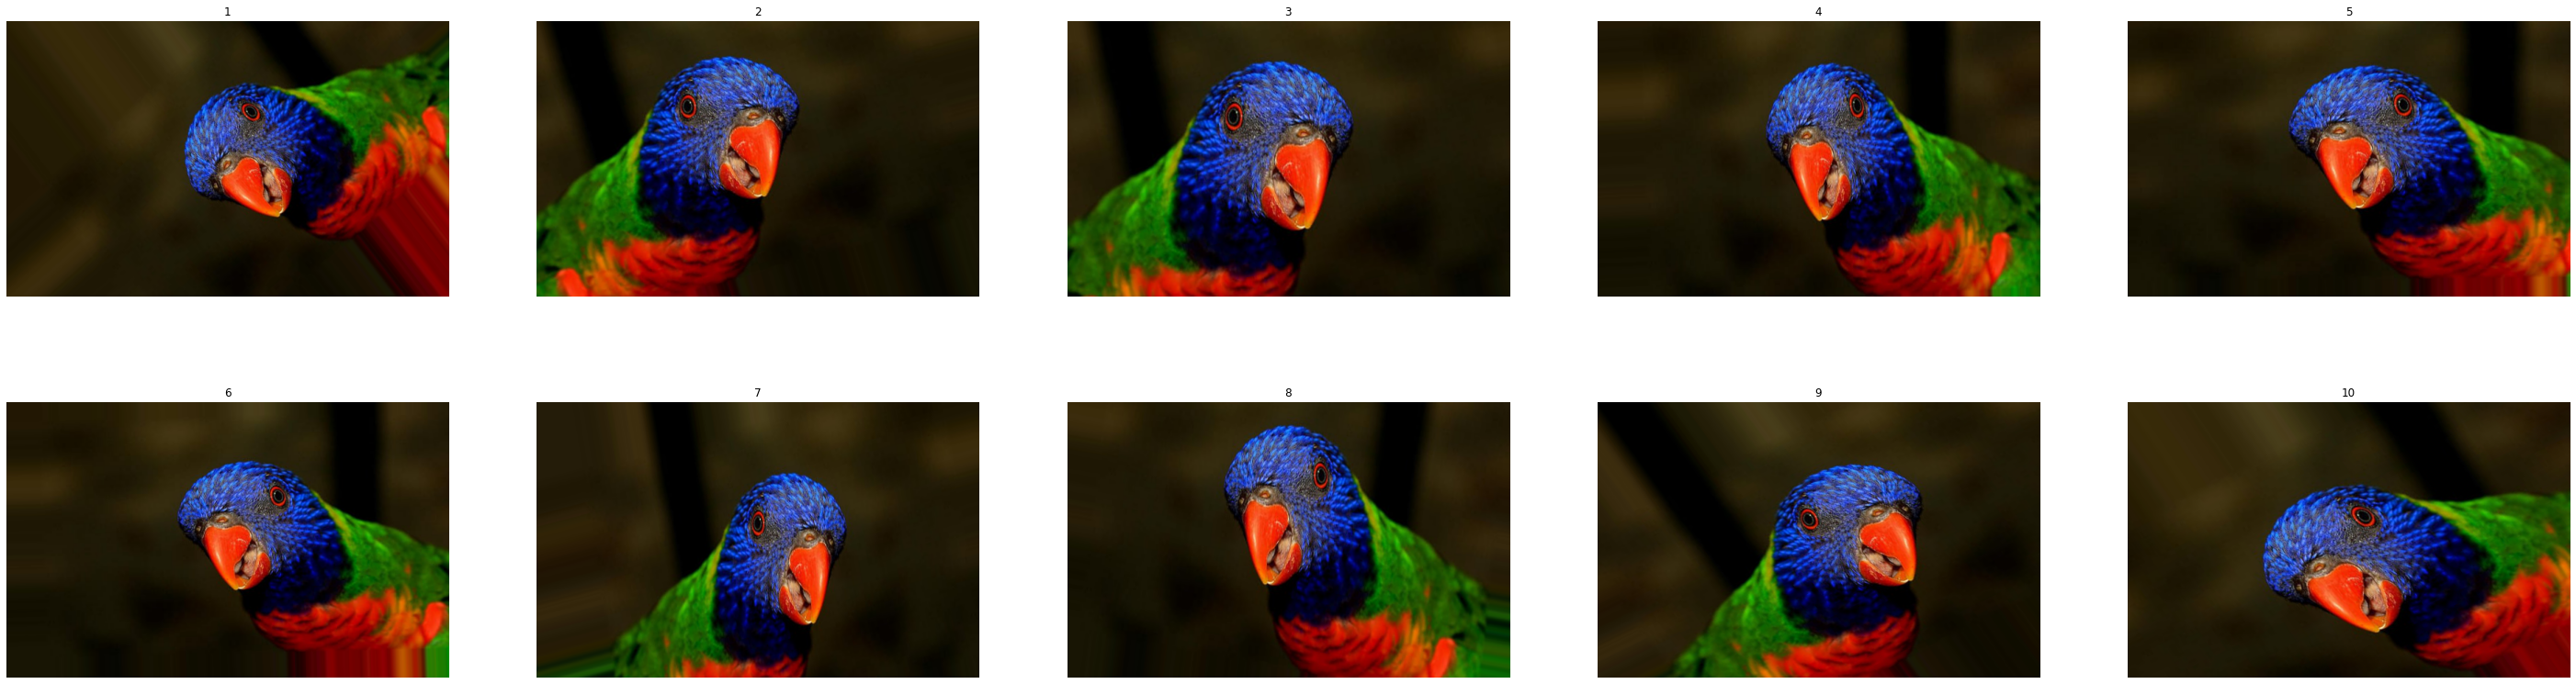

In [30]:
# code for displaying multiple images in one figure
  
#import libraries
import cv2
from matplotlib import pyplot as plt
  
# create figure
fig = plt.figure(figsize=(50, 14))
plt.tight_layout()
# setting values to rows and column variables
rows = 2
columns = 5

for i in range(10):
# Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, i+1)
  image = augmented[i].astype('uint8')
  
# showing image
  plt.imshow(image)
  plt.axis('off')
  plt.title(str(i+1))


In [31]:
 dictionary = {0: 'airplane',
1: 'automobile',
2: 'bird',
3: 'cat',
4: 'deer',
5: 'dog',
6: 'frog',
7: 'horse',
8: 'ship',
9: 'truck'}

num_classes = 10

In [140]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

X_train_df = pd.DataFrame(np.reshape(X_train , (50000 , 32*32*3)) )
Y_train_df = pd.DataFrame(Y_train )
train = pd.concat ([X_train_df , Y_train_df ]  , axis = 1 )

chosenLabel = 3

selectedRows = train [train.columns[train.iloc[: , -1:]] == chosenLabel]
toBeRemoved= (selectedRows.sample(frac=.9).index)


X_train, X_validation,  Y_train, Y_validation = train_test_split( X_train , Y_train, test_size=0.33, random_state=42 )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':


In [142]:
indexes_to_keep = set(range(train.shape[0])) - set(toBeRemoved)


In [144]:
len(indexes_to_keep)

45500

In [138]:
selectedRows

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071,0
9,125,125,116,110,101,91,102,90,83,106,97,94,106,99,96,141,135,131,175,170,166,175,169,165,148,141,136,106,88,83,74,54,49,71,56,49,73,61,53,80,...,127,100,56,128,101,56,130,103,59,132,104,60,132,105,62,132,107,67,134,109,70,136,110,75,138,112,79,140,114,81,143,117,82,143,116,84,144,116,86,3
17,110,104,97,142,135,118,151,146,120,133,131,117,83,82,79,55,56,54,48,48,49,51,52,54,51,52,55,52,53,57,50,51,53,51,52,54,50,52,53,53,...,68,71,91,69,71,90,71,71,89,68,68,86,69,67,87,64,62,83,61,59,81,64,61,79,57,56,71,52,54,67,45,48,60,47,46,60,51,48,62,3
21,252,8,42,249,15,42,250,8,39,251,1,32,251,1,25,249,2,21,239,1,8,248,1,17,251,4,34,251,15,43,249,19,44,250,29,46,251,25,46,251,...,249,75,110,250,89,124,250,93,125,250,87,120,251,89,121,251,86,117,251,75,105,251,66,97,251,81,117,251,85,121,250,78,113,250,74,109,251,58,88,3
26,131,81,32,124,76,27,116,70,20,124,78,29,142,97,45,159,114,63,171,125,76,174,128,80,180,136,88,184,143,93,190,144,99,194,149,100,177,148,107,142,...,57,34,18,64,41,26,59,40,27,58,40,29,42,26,18,32,21,17,16,12,9,14,11,5,40,25,17,91,65,47,140,104,69,156,114,73,164,118,73,3
33,7,5,8,7,5,8,5,4,6,7,4,7,11,5,9,11,5,9,17,11,15,25,19,23,18,9,17,9,1,9,13,7,15,24,19,27,21,19,25,34,...,137,125,84,139,126,86,141,131,96,148,143,123,163,156,141,150,142,115,146,136,110,145,129,97,138,121,82,121,110,82,83,83,76,67,74,81,114,120,119,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49970,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,3
49975,78,76,106,75,72,119,76,75,117,78,77,118,80,78,121,79,77,126,80,79,120,83,83,124,84,83,118,83,81,113,83,80,114,82,81,117,82,81,119,83,...,45,44,49,45,44,49,45,44,49,45,43,48,46,43,48,45,43,51,46,45,54,44,44,51,54,52,62,66,62,77,69,62,80,73,68,87,60,57,69,3
49979,4,4,4,4,4,4,5,5,5,0,0,0,80,62,45,203,168,131,191,162,128,174,151,115,174,151,109,171,148,107,135,110,73,136,111,76,146,126,91,147,...,84,75,49,77,71,48,69,61,43,64,49,36,78,62,45,96,84,59,87,73,53,58,47,37,26,22,18,7,8,4,12,13,11,11,11,11,3,3,3,3
49982,41,41,41,39,39,37,39,39,36,41,40,36,43,42,37,43,42,38,45,44,40,47,46,42,48,47,44,50,48,46,52,48,47,53,49,48,54,50,48,54,...,72,51,44,73,52,44,75,53,43,76,53,44,76,53,42,77,53,43,79,55,43,79,55,45,80,56,45,81,57,45,80,56,44,82,56,44,85,59,45,3


In [139]:
keptRows

Int64Index([13085,   197, 47681, 41826, 19327,  4405, 36599, 44636, 22826,
            46919,
            ...
            31094, 35669,  8599, 25933, 37408, 23218,  9183, 19830, 12943,
            49143],
           dtype='int64', length=4500)

In [123]:

# train.drop[train[selectedRows]]
# train.drop(selectedRows)

# chosenLabel = 5




# toBeRemoved = (train[selectedRows]).sample(int(numberOfSamples*0.9))
# numberOfSamples = len( selectedRows)
# print(numberOfSamples)

# toBeRemoved = train [train['label']==chosenLabel].sample(int(numberOfSamples*0.8))

# indexes_to_keep = set(range(train.shape[0])) - set(toBeRemoved.index)
# train_sliced = train.take(list(indexes_to_keep))
# grayScale = 255
# x_train_sliced1 = train_sliced.drop('label' , axis = 1).astype ('float32').to_numpy()
# x_train_sliced1/=grayScale
# y_train_sliced1 = train_sliced['label'].to_numpy()


# x_train_sliced, x_validation_sliced, y_train_sliced, y_validation_sliced =\
# train_test_split(x_train_sliced1, y_train_sliced1, test_size=0.3, random_state=123 , shuffle  = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [125]:
selectedRows

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071,0
19,100,82,54,124,106,75,131,113,79,134,117,80,119,100,64,110,89,56,112,93,60,102,85,52,101,87,54,92,80,47,85,74,43,100,83,54,108,96,64,103,...,151,111,120,132,96,102,120,96,100,123,103,110,184,168,178,162,150,157,89,77,79,85,69,71,92,71,80,95,73,85,92,69,82,83,62,71,81,63,68,3
29,103,124,31,99,123,13,128,153,37,116,138,37,92,114,17,127,150,35,169,188,90,187,202,119,157,175,62,124,141,36,150,165,64,154,173,55,156,176,66,150,...,99,106,52,147,155,77,204,214,108,205,210,111,150,146,84,102,91,60,107,99,66,139,146,85,143,162,93,138,163,98,140,170,97,135,165,95,150,180,116,3
39,92,96,98,92,94,96,94,99,102,94,98,101,94,98,101,94,98,101,95,99,102,97,99,102,98,99,103,98,99,103,98,99,103,97,100,103,99,100,103,96,...,62,68,74,65,69,74,68,70,72,67,67,66,65,65,64,64,65,65,59,61,62,54,56,59,51,55,60,47,52,57,39,46,51,36,43,48,40,45,50,3
40,155,140,160,157,142,163,157,143,166,155,143,167,156,140,165,158,136,161,161,140,162,157,136,156,152,131,150,152,132,149,155,134,151,154,134,151,151,130,148,158,...,196,177,205,195,176,204,195,176,203,196,177,204,195,176,203,193,174,201,190,172,199,188,172,198,184,170,196,181,167,192,178,164,190,177,163,188,176,161,187,3
64,239,221,192,249,229,202,253,248,235,234,211,196,110,79,58,105,134,172,136,182,242,133,177,236,135,180,240,137,181,240,139,180,237,138,181,237,140,183,239,142,...,212,174,115,243,209,150,250,231,177,197,152,96,181,119,48,231,181,114,250,227,182,251,244,233,234,246,250,217,246,254,219,247,254,221,248,255,221,248,255,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33448,131,129,166,142,142,179,149,150,184,135,136,168,127,124,156,123,120,150,119,119,152,111,113,146,102,105,140,100,105,142,102,108,147,110,118,158,113,121,160,110,...,131,113,107,144,127,122,162,146,143,179,166,165,197,187,189,213,206,211,229,225,230,240,236,241,245,241,246,250,247,251,251,251,251,243,243,244,228,229,229,3
33473,251,254,255,253,255,255,253,254,254,250,254,249,239,247,243,175,186,193,81,94,111,85,99,113,125,138,147,184,196,201,219,229,231,238,246,245,248,253,253,252,...,123,136,151,100,118,137,104,125,145,108,129,147,111,131,147,157,172,184,225,236,241,246,251,253,249,250,250,255,253,252,255,254,251,254,254,252,251,253,252,3
33486,195,195,195,81,81,81,19,19,19,35,36,35,37,39,36,36,38,35,35,37,34,31,33,30,36,36,34,44,43,41,49,48,44,48,48,42,48,48,40,47,...,43,49,49,44,50,50,45,51,51,47,53,53,45,51,51,45,51,51,43,48,49,39,46,46,35,44,43,37,46,45,33,42,41,31,40,39,27,36,35,3
33491,209,204,215,199,188,200,197,181,194,165,146,160,90,73,81,60,46,46,58,44,44,60,46,46,80,66,66,105,90,91,97,84,83,77,62,61,86,68,68,93,...,82,61,63,104,84,89,189,179,191,228,218,231,220,208,219,213,198,208,192,176,185,219,204,214,228,221,233,216,217,228,223,219,226,212,194,197,188,157,155,3


In [80]:
train = pd.concat ([X_train_df , Y_train_df ]  , axis = 1 ,  keys=[ 'label'])
train.head()

label                                ...                                   
   0    1    2    3    4    5    6     ... 3065 3066 3067 3068 3069 3070 3071
0   233  231  143  232  230  142  235  ...  113   90  129  110   89  128  109
1     4    4    3    5    7    4    5  ...  133  133  127  128  127  121  121
2   144  162  131  112  133  107  126  ...  116  117  119  114  119  121  116
3   196  211  201  161  179  169   99  ...  228  216  236  229  217  238  231
4   165  185  211  163  183  209  163  ...  193  138  165  192  141  165  193

[5 rows x 3072 columns]

In [79]:
df = train
df = df.drop(df[df['label'] > 4].sample(frac=.9).index)


ValueError: ignored

NameError: ignored

In [63]:
train.shape

(33500, 3073)

In [41]:
idxes = np.random.randint(0, 5000, size=100 , ) # generate a set to sample from


In [57]:
type(X_train_df)

pandas.core.frame.DataFrame

In [42]:
indexesToRemove = np.random.choice(5000, size=4500, replace=False)

In [45]:
a  = np.where(Y_train == 3)

In [43]:
X_train = np.delete(X_train , indexesToRemove)

array([2638, 4370, 4954, ..., 1598, 4837, 4584])

In [53]:
X_train.shape

(33500, 32, 32, 3)

In [47]:
a.shape

AttributeError: ignored

In [48]:
a.size

AttributeError: ignored

In [49]:
len(a)

2